# PROJECT STARTS HERE

# Importing Libraries and Modules

In [1]:
import sklearn 
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import time
import mediapipe as mp
import csv
import dill

In [ ]:
# !pip3 install opencv-python
# !pip3 install dill

In [22]:
# To save variable of the last session (avoid re-executing the cells)
# dill.dump_session('base_variables3.db')

In [6]:
# To load session variables
# dill.load_session('base_variables3.db')

# Frame Extraction

In [3]:
# Folder path of dataset
# video_path = r"C:\Users\revan\Downloads\00335.mp4"
# folder_path = r'D:\WLASL Datasets\Kaggle_WLASL_withVideosInClassFolders\dataset\SL'
folder_path = r'D:\FYP_HWU\Videos'
DATA_PATH = r'D:\FYP_HWU'
# output_csv = os.path.join('dummy_dataset2')

In [2]:
# List of actions to train model with (11 classes or actions)
# actions = np.array(['Hello', 'Thank You', 'I Love You', 'Namaste'])
actions = [
'accident', 
'call', 
'help', 
'man', 
'murder', 
'woman', 
'danger',
'police', 
'follow',
'child',
'sick'
]

# actions = ['accident']


In [2]:
temp_actions = ['follow', 'child','police']

In [8]:
len(temp_actions)

3

### Counting number of videos under each action in the dataset

In [3]:
# folder_path = r'C:\Users\dr2007\Documents\FYP_HWU\Aug_Frames'
folder_path = r'D:\WLASL Datasets\Kaggle_WLASL_withVideosInClassFolders\dataset\SL'

In [67]:
# Initializing variables
video_count = {}
folder_path = r'D:\FYP_HWU\NEW_Frames'

# Creating a dictionary for all the actions/classes along with the count of videos for each action in the dataset
for root, dirs, files in os.walk(folder_path):
    for i in dirs: #loop through each of the keywords or actions in the dataset
        if (i in actions): #if the keyword is present in the shortlisted list of actions
            for root, dirs, files in os.walk(os.path.join(folder_path, i)):
                video_count[i] = len(dirs) 
                break
    break

print(video_count)

{'accident': 13, 'call': 12, 'child': 9, 'danger': 11, 'follow': 9, 'help': 14, 'man': 12, 'murder': 13, 'police': 10, 'sick': 10, 'woman': 11}


In [11]:
# Initializing variables
video_count = {}
first_11_items = {}
# folder_path = r'D:\FYP_HWU\NEW_Frames'

# Creating a dictionary for all the actions/classes along with the count of videos for each action in the dataset
for root, dirs, files in os.walk(folder_path):
    for i in dirs: #loop through each of the keywords or actions in the dataset
        for root, dirs, files in os.walk(os.path.join(folder_path, i)):
            video_count[i] = len(files) 
            break
    
    break


In [13]:
video_count1 = sorted(video_count.items(), key=lambda x:x[1], reverse = True)

In [16]:
for idx, k in enumerate(video_count1):
    if idx == 11: break
    first_11_items[k[0]] = k[1]

print(first_11_items)
# print(video_count)

{'cousin': 17, 'before': 16, 'cool': 16, 'thin': 16, 'drink': 15, 'go': 15, 'computer': 14, 'help': 14, 'inform': 14, 'take': 14, 'who': 14}


In [17]:
# print(video_count1)

In [ ]:
# video_count = {'accident': 13, 'call': 12, 'child': 9, 'danger': 11, 'help': 14, 'man': 12, 'murder': 13, 'police': 10, 'sick': 10, 'woman': 11}

In [3]:
temp_video_count = {'follow': 36, 'child': 36, 'police': 40}

In [10]:
len(temp_video_count)

3

### Getting the video paths of the videos

In [ ]:
# # Creating a dictionary for the actions and the count of videos for the chosen actions to train the model
# for action in actions:
#     classes[action] = my_dict[action]
# print(classes)

In [5]:
video_paths = {}

# Creating a dictionary for all the actions/classes along with the count of videos for each action in the dataset
for root, dirs, files in os.walk(folder_path):
    
    for action in actions:
        for root, dirs, files in os.walk(os.path.join(folder_path, action)):
            for i in range (len(files)):
                files[i] = os.path.join(folder_path, action, files[i])
            video_paths[action] = files
            break
    break

# print(video_paths)

In [8]:
import pandas as pd

# converting the folderpaths to csv file
df = pd.DataFrame.from_dict(video_paths, orient='index')
df = df.transpose()
df.to_csv('video_paths.csv', index=False)

In [ ]:
# Reading a csv file to get the video paths
def read_csv_to_dict(csv_file):
    result_dict = {}

    with open(csv_file, 'r') as file:
        csv_reader = csv.reader(file)
        
        # Read the header row to get the keys
        keys = next(csv_reader, None)
        if keys:
            for key in keys:
                result_dict[key] = []

            # Read the rest of the rows and store values in the dictionary
            for row in csv_reader:
                for i in range(len(keys)):
                    result_dict[keys[i]].append(row[i])

    return result_dict

In [ ]:
video_paths = read_csv_to_dict("video_paths.csv")

In [ ]:
# temp_video_path = {}
# temp_video_path['follow'] = video_paths['follow']

In [ ]:
print(temp_video_path)

In [18]:
# print(video_paths)

### Creating folders to store frames 

In [ ]:
#Creating folder 'Frames' that will contain all the video frames
# os.makedirs(os.makedirs(os.path.join(DATA_PATH,'Frames')))
# os.makedirs(os.path.join(DATA_PATH,'Original_Frames'))

In [163]:
DATA_PATH = r'D:\FYP_HWU'
os.makedirs(os.path.join(DATA_PATH,'NEW_Frames'))

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:\\FYP_HWU\\NEW_Frames'

In [162]:
DATA_PATH = r'D:\FYP_HWU'
DATA_PATH = os.path.join(DATA_PATH,'NEW_Frames')

#Creating one folder for each action
for action in video_paths.keys():
    # 1 folder for each video of the action
    for sequence in range(len(video_paths[action])):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [5]:
# DATA_PATH

## Extracting frames from videos and adding them to folders

### APPROACH 1
Here, a fixed number of frames are extracted from each video (60 in the current case). If the extracted frames from a video are less than 60, then the last frame is repeated to reach the 60 count. If the video is too long, then then the first 60 frames of the video will be extracted.

In [ ]:
# #looping through each action
# for action in video_paths.keys():
    
#     #Looping through each video of the action
#     for sequence in range(len(video_paths[action])):
        
#         # Open the video file
#         cap = cv2.VideoCapture(video_paths[action][sequence])
        
#         hc=[]
        
#         # Initializing variables
#         frame_count = 0       # current frame count
#         max_fc = 60          # maximum frame count (ranging from 65 to 70 frames)
# #         DATA_PATH = os.path.join('Frames') #path to folder "Frames" to store the extracted frames
        
#         with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
#             #while the video is accessible and the current frame count doesn't exceed the max frame count limit
#             while (cap.isOpened() and frame_count < max_fc):
#                 #reading the video frame
#                 success, frame = cap.read()
#                 #if there are frames
#                 if success:
#             #         print("SUCCESS")
#                     # Make detection
#                     image, result = mediapipeHolistics(frame, holistic)

#                     #Darwing landmarks on frames
#                     draw_landmarks(image,result)

#                     cv2.imshow("{} - {}".format(action, sequence), image)
                    
#                     # saving the keypoints extracted (in numpy format)
# #                     np.save(DATA_PATH, image)
#                     keypoints = extract_keypoints(result)
#                     npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_count))
#                     np.save(npy_path, keypoints)
                    
#                     #saving the extracted frames (in jpg format)
#                     cv2.imwrite(os.path.join(DATA_PATH , action, str(sequence), 'frame'+ str(frame_count) + '.jpg'), image)
#                     frame_count+=1
# #                     hc.append([join(DATA_PATH ,'/', action, '/', str(sequence), '/', 'frame'+ str(frame_count) + '.jpg'), action, frame_count])
                    
#                 else:
#                     break
                    
#             # repeat last frame until we reach max frame count
#             while frame_count < max_fc:
#                 cv2.imwrite(os.path.join(DATA_PATH , action, str(sequence), 'frame'+ str(frame_count) + '.jpg'), image)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_count))
#                 np.save(npy_path, keypoints)
#                 frame_count+=1
# #                     hc.append([join(DATA_PATH ,'/', action, '/', str(sequence), '/', 'frame'+ str(frame_count) + '.jpg'), action, frame_count])

#         cap.release()
#         cv2.destroyAllWindows()
                


In [ ]:
#looping through each action
for action in video_paths.keys():
    
    #Looping through each video of the action
    for sequence in range(len(video_paths[action])):
        
        # Open the video file
        cap = cv2.VideoCapture(video_paths[action][sequence])
        
        # Initializing variables
        frame_count = 0       # current frame count
        max_fc = 60          # maximum frame count
        

        #while the video is accessible and the current frame count doesn't exceed the max frame count limit
        while (cap.isOpened() and frame_count < max_fc):
            #reading the video frame
            success, frame = cap.read()
            
            #if there are frames
            if success:
                image = frame.copy()
                cv2.imshow("{} - {}".format(action, sequence), image)
                
                #saving the extracted frames (in jpg format)
                cv2.imwrite(os.path.join(DATA_PATH , action, str(sequence), 'frame'+ str(frame_count) + '.jpg'), image)
                frame_count+=1
            else:
                break

        # repeat last frame until we reach max frame count
        while frame_count < max_fc:
            cv2.imwrite(os.path.join(DATA_PATH , action, str(sequence), 'frame'+ str(frame_count) + '.jpg'), image)
            frame_count+=1

        cap.release()
        cv2.destroyAllWindows()

### APPROACH 2
Here too, a fixed number of frames are extracted from each video (25/30 in the current case). The frames will be extracted after dividing the complete video into equal parts and then choosing the frames from each part. This way we will be able to avoid the first few or last frames few of the video if no action is being depicted. Secondly, the basic movement of the action is captured.

In [45]:
# how many frames to extract?
count = []
for action in video_paths.keys():
        #Looping through each video of the action
        for sequence in range(len(video_paths[action])):
            cap = cv2.VideoCapture(video_paths[action][sequence])
            total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
            count.append(total_frames)
            cap.release()

In [47]:
print(min(count))

25.0


In [130]:
print(max(count))

155.0


In [136]:
tcount = []

In [142]:
cap = cv2.VideoCapture(video_paths['accident'][0])
total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
tcount.append(total_frames)
cap.release()

In [140]:
DATA_PATH = os.path.join(DATA_PATH, 'new_fol')
os.makedirs(DATA_PATH)

In [143]:
print(tcount)

[109.0, 104.0, 104.0]


In [19]:
DATA_PATH = r'D:\FYP_HWU\NEW_Frames'
NEW_PATH = r'D:\FYP_HWU\New folder'

In [166]:
def frameSkipping(video_paths, n):
    for action in video_paths.keys():

        #Looping through each video of the action
        for sequence in range(len(video_paths[action])): #len(video_paths[action])
            cap = cv2.VideoCapture(video_paths[action][sequence])

            total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)  #getting the total frame count
            frames_step = total_frames//n    # getting the number of frames to skip

            for frame_num in range(n):
                #here, we set the parameter 1 which is the frame number to the frame (i*frames_step)
                cap.set(1,frame_num*frames_step)
                success,image = cap.read()  
                #save your image
                cv2.imwrite(os.path.join(DATA_PATH, action, str(sequence), 'frame'+ str(frame_num) + '.jpg'), image)
        
            cap.release()


In [167]:
frameSkipping(video_paths, 20)

# Data Preprocessing

By the end of this section, we will folders containing the images frames stored in jpg format for each video of each action.

## Data Augmentation 
 Using:
 - Frame Mirroring 
 - Changing contrast and brightness
 - Rotating 
 
 Here, we take each video, extract frames and for each frame, apply the filters (which may wither include changing the contrast and brightness of the image frame, mirroring the image or extracting only the keypoints and the edges from the image), and store them as a separate video.


In [27]:
from PIL import Image, ImageEnhance

In [45]:
def blackAndWhite(image): # takes image as a parameter
    # Image color
    enhancer = ImageEnhance.Color(image)
    new_image = enhancer.enhance(0)  
    
    # return np.array(new_image)
    return new_image

In [46]:
def saturation(image): # takes image as a parameter
    # Horizontally flipping the image
    image = flipImage(image)
    # Image color
    enhancer = ImageEnhance.Color(image)
    new_image = enhancer.enhance(1.5)  
    
    # return np.array(new_image)
    return new_image

In [47]:
def flipImage(image): # takes image as a parameter
    # Converting Image to numpy array
    new_image = np.array(image)
    
    # Horizontally flipping the image
    image = cv2.flip(new_image, 1)
    
    # Converting numpy aray to image format
    image = Image.fromarray(image.astype('uint8'))  
    
    # Returning the image in image format
    return image

In [48]:
def rotateImage(image):
    image  = image.rotate(-8)  #- or + -> left or right
    return image

In [41]:
# # Reading the image
# # cap = cv2.VideoCapture(r'C:\Users\revan\Downloads\10453.mp4')
# image = cv2.imread(r'D:\FYP_HWU\NEW_Frames')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# # success,image = cap.read()  
# # print(success)
# # Resizing the Image
# new_image = resizeFrames(image, resize)

# #Converting numpy array to Image
# image = Image.fromarray(new_image.astype('uint8')) 

# new_image = rotateImage(image)

# # Converting Image to numpy array
# # new_image = np.array(new_image)

# #Saving the image in the folder created
# new_image.show()

# # Displaying Image
# cv2.destroyAllWindows()
resize = (224,224)
for frame_num in range (20): 
    IMAGE_PATH = os.path.join(DATA_PATH, 'child', '7' , 'frame' + str(frame_num) + '.jpg')

    # Reading the image
    image = cv2.imread(IMAGE_PATH)

    # Resizing the Image
    new_image = resizeFrames(image, resize)

    #Converting numpy array to Image
    image = Image.fromarray(new_image.astype('uint8')) 

    # Applying the filters
    new_image = rotateImage(image)

    # Converting Image to numpy array
    new_image = np.array(new_image)

    #Saving the image in the folder created
    cv2.imwrite(os.path.join(NEW_PATH , 'frame'+ str(frame_num) + '.jpg'), new_image)

    # Displaying Image
    cv2.destroyAllWindows()

In [49]:
# Cropping the center of the image (cropping out the extra background margins of the video.)
def crop_center_square(frame): # takes image as a parameter
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y:start_y+min_dim,start_x:start_x+min_dim]

In [50]:
# Function to resize the frames
def resizeFrames(new_image, resize): # takes numpy array as parameter
    new_image = crop_center_square(new_image)
    new_image = cv2.resize(new_image, resize)
    return new_image # returns a numpy array

In [8]:
# Getting the final number of videos under each Action 
def totalVideoCount(DATA_PATH):
    finalVideoCount = {}
    for root, dirs, files in os.walk(DATA_PATH):
        for folder in dirs:
            for root, dirs, files in os.walk(os.path.join(DATA_PATH, folder)):
                finalVideoCount[folder] = len(dirs)
                break
    return finalVideoCount

In [ ]:
PATH = r'D:\FYP_HWU\Resized_Frames'
videoCount = totalVideoCount(PATH)
print(videoCount)

In [ ]:
# IMAGE_PATH = os.path.join(DATA_PATH,'accident', '6', 'frame' + '11' +'.jpg')
# print(IMAGE_PATH)

In [ ]:
# resize = (224,224)
# img = cv2.imread(IMAGE_PATH)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# # transposed  = img.rotate(-10) 
# # new_image = np.array(transposed)
# new_image = crop_center_square(img)
# new_image = cv2.resize(new_image, resize)
# image = Image.fromarray(new_image.astype('uint8')) 
# new_image = rotateImage(image)
# new_image.show()
# # image.show()
# cv2.destroyAllWindows()

In [52]:
DATA_PATH = r'D:\FYP_HWU\NEW_Frames'
VideoCount = totalVideoCount(DATA_PATH)
print(VideoCount)

{'accident': 13, 'call': 12, 'child': 9, 'danger': 11, 'follow': 9, 'help': 14, 'man': 12, 'murder': 13, 'police': 10, 'sick': 10, 'woman': 11}


In [61]:
# video_count = dictionary that maps actions to the number of videos for that action
# video_path = dictionary that maps actions to a list containing the path of videos under that action
# max_fc = 60 (maximum number of frames extracted per video), variable already initialized earlier

# loop through each video (sequence) for each action
# create another sequece folder (my_dict[action] + count), where count is incremented with every sequence loop iteration
# for loop for i in range(60):
# get the image -> concat('frame', str(i))
# apply filters
# save the image in the new folder created

max_fc = 20
resize = (224,224)
AUG_PATH = r'D:\FYP_HWU\NEW_AUG_Frames'
# PATH = r'D:\FYP_HWU\Rotate_Frames'
DATA_PATH = r'D:\FYP_HWU\NEW_Frames'

finalVideoCount = totalVideoCount(AUG_PATH)
video_count = totalVideoCount(DATA_PATH)

#looping through each action
for action in video_count.keys():
    actionCount = finalVideoCount[action]
    
    #Looping through the count for videos for that action
    for sequence in range(video_count[action]):
        
        #creating a folder to store the augmented images
        folder_number = actionCount + sequence
        if(folder_number < 45):
            try:
                os.makedirs(os.path.join(AUG_PATH, action, str(folder_number)))
            except:
                pass

            for frame_num in range (max_fc): 
                IMAGE_PATH = os.path.join(AUG_PATH, str(action), str(sequence) , 'frame' + str(frame_num) + '.jpg')

                # Reading the image
                image = cv2.imread(IMAGE_PATH)
                
                # Resizing the Image
#                 new_image = resizeFrames(image, resize)
                
                #Converting numpy array to Image
                image = Image.fromarray(image.astype('uint8')) 

                # Applying the filters
#                 new_image = blackAndWhite(image)
#                 new_image = flipImage(image)
#                 new_image = saturation(image)
                new_image = rotateImage(image)

                # Converting Image to numpy array
                new_image = np.array(new_image)

                #Saving the image in the folder created
                cv2.imwrite(os.path.join(AUG_PATH , str(action), str(folder_number), 'frame'+ str(frame_num) + '.jpg'), new_image)

                # Displaying Image
                cv2.destroyAllWindows()
        
        else:
            break


In [62]:
finalVideoCount = totalVideoCount(AUG_PATH)
print(finalVideoCount)

{'accident': 45, 'call': 45, 'child': 45, 'danger': 45, 'follow': 45, 'help': 45, 'man': 45, 'murder': 45, 'police': 45, 'sick': 45, 'woman': 45}


## Resizing Images

Resizing the images to 224 x 224 pixel size to feed to ResNet 50 pre trained model.

In [ ]:
# Cropping the center of the image (cropping out the extra background margins of the video.)
def crop_center_square(frame): # takes image as a parameter
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y:start_y+min_dim,start_x:start_x+min_dim]

In [ ]:
# resize = (224,224)
# IMAGE_PATH = r'C:\Users\revan\Downloads\frame3.jpg'

In [ ]:
# image = cv2.imread(IMAGE_PATH)
# image = Image.fromarray(image.astype('uint8')) 
# # image.show()

# new_image = np.array(image)
# new_image = crop_center_square(new_image)
# new_image = cv2.resize(new_image, resize)
# image = Image.fromarray(new_image.astype('uint8')) 
# image.show()
# cv2.destroyAllWindows()

In [ ]:
# Function to resize the frames
def resizeFrames(new_image, resize): # takes numpy array as parameter
    new_image = crop_center_square(new_image)
    new_image = cv2.resize(new_image, resize)
    return new_image # returns a numpy array

In [56]:
max_fc = 20
resize = (224,224)
AUG_PATH = r'D:\FYP_HWU\NEW_AUG_Frames'
# FRAMES_PATH = r'D:\FYP_HWU\Resized_Frames'
DATA_PATH = r'D:\FYP_HWU\NEW_Frames'

videoCount = totalVideoCount(DATA_PATH) #getting a video count from original frame dataset

#looping through each action
for action in videoCount.keys():
    
    #Looping through the count for videos for that action
    for sequence in range(videoCount[action]):
        #creating a folder in AUG frames folder
        try:
            os.makedirs(os.path.join(AUG_PATH, action, str(sequence)))
        except:
            pass
        # iterating through each frame in the original frame dataset
        for frame_num in range (max_fc): 
            IMAGE_PATH = os.path.join(DATA_PATH, str(action), str(sequence) , 'frame' + str(frame_num) + '.jpg')

            # Reading the image
            image = cv2.imread(IMAGE_PATH)

            new_image = resizeFrames(image, resize)

            #Saving the image in the folder created
            cv2.imwrite(os.path.join(AUG_PATH, str(action), str(sequence), 'frame' + str(frame_num) + '.jpg'), new_image)

            # Displaying Image
            cv2.destroyAllWindows()


## Keypoint Extraction using MediaPipe Holistics
Applying MediaPipe Keypoint Landmarks to the extracted frames

In [3]:
mp_holistic = mp.solutions.holistic #Holistic model (use for detections)
mp_drawing = mp.solutions.drawing_utils #Drawing Utilities
drawing_spec = mp_drawing.DrawingSpec(thickness = 1, circle_radius=1)

In [4]:
#Capturing landmarks
def mediapipeHolistics(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color conversion -> BGR to RGB
    image.flags.writeable = False
    results = model.process(image) # Making Prediction 
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #color conversion -> RGB to BGR
    return image, results 

In [6]:
#Visualize landmarks, connecting the landmarks on the image (drawing only pose and had landmarks)
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image = image, 
                              landmark_list = results.pose_landmarks, 
                              connections = mp_holistic.POSE_CONNECTIONS,
                              landmark_drawing_spec = drawing_spec,
                              connection_drawing_spec = drawing_spec)
    mp_drawing.draw_landmarks(image = image, 
                              landmark_list = results.left_hand_landmarks, 
                              connections = mp_holistic.HAND_CONNECTIONS,
                              landmark_drawing_spec = drawing_spec,
                              connection_drawing_spec = drawing_spec)
    mp_drawing.draw_landmarks(image = image, 
                              landmark_list = results.right_hand_landmarks, 
                              connections = mp_holistic.HAND_CONNECTIONS,
                              landmark_drawing_spec = drawing_spec,
                              connection_drawing_spec = drawing_spec)

In [ ]:
# Capturing hand, pose and face landmarks
def extract_keypoints(result):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in result.pose_landmarks.landmark]).flatten() if result.pose_landmarks else np.zeros(33*4)
    leftHand = np.array([[res.x,res.y,res.z] for res in result.left_hand_landmarks.landmark]).flatten() if result.left_hand_landmarks else np.zeros(21*3)
    rightHand = np.array([[res.x,res.y,res.z] for res in result.right_hand_landmarks.landmark]).flatten() if result.right_hand_landmarks else np.zeros(21*3)
    face = np.array([[res.x,res.y,res.z] for res in result.face_landmarks.landmark]).flatten() if result.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose, face, leftHand, rightHand])
#     return np.concatenate([pose, leftHand, rightHand])

In [ ]:
# IMAGE_PATH = os.path.join(FRAMES_PATH,'accident', '8', 'frame' + '30' +'.jpg')
# print(IMAGE_PATH)

In [ ]:
# # resize = (224,224)
# img = cv2.imread(IMAGE_PATH)
# with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
#     # Making detection
#     image, result = mediapipeHolistics(img, holistic)
    
#     #Darwing landmarks on frames
#     draw_landmarks(image,result)

# # #Saving the keypoints extracted
# keypoints = extract_keypoints(result)    
# print(len(keypoints))
# image = Image.fromarray(image.astype('uint8')) 
# image.show()
# # image.show()
# cv2.destroyAllWindows()

In [9]:
max_fc = 20
AUG_PATH = r'D:\FYP_HWU\NEW_AUG_Frames'
FRAMES_PATH = r'D:\FYP_HWU\NEW_MP_Frames'
# NP_PATH = r'D:\FYP_HWU\MP_npArray'

finalVideoCount = totalVideoCount(AUG_PATH)

#looping through each action
for action in finalVideoCount.keys():
    
    #Looping through the count for videos for that action
    for sequence in range(finalVideoCount[action]):
        
        # Creating folders to store frames and extracted landmarks
        try:
            os.makedirs(os.path.join(FRAMES_PATH, action, str(sequence)))
#             os.makedirs(os.path.join(NP_PATH, action, str(sequence)))
        except:
            pass
        
        with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
            for frame_num in range (max_fc): 
                
                # Getting the extracted frame from the folder
                IMAGE_PATH = os.path.join(AUG_PATH, str(action), str(sequence) , 'frame' + str(frame_num) + '.jpg')

                # Reading the image
                image = cv2.imread(IMAGE_PATH)

                # Making detection
                image, result = mediapipeHolistics(image, holistic)

                #Darwing landmarks on frames
                draw_landmarks(image,result)

                #Saving the keypoints extracted
#                 keypoints = extract_keypoints(result) 
                
                #Storing keypoints in numpy format
#                 npy_path = os.path.join(NP_PATH, action, str(sequence), str(frame_num))
#                 np.save(npy_path, keypoints)
                
#                 image = Image.fromarray(image.astype('uint8')) 

                #Saving the image in the folder created
                cv2.imwrite(os.path.join(FRAMES_PATH , str(action), str(sequence), 'frame'+ str(frame_num) + '.jpg'), image)

                # Displaying Image
                cv2.destroyAllWindows()


In [ ]:
#     cap.release()
cv2.destroyAllWindows()

# Creating the Dataset

### Visualizing dataset frames

In [ ]:
# man (video 0, frame 22)
img_man = image.load_img("{}/man/0/frame22.jpg". format(DATA_PATH))
print("ACTION: Man    Video: 0     Frame: 22")
img_man

## Creating Labels and Features

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# # Splitting data in 80:10:10 train:validation:test ratio
# def trainTestSplit(X,y):
#     x_train, x_temp, y_train, y_temp= train_test_split(X, y, test_size=0.2, random_state=42)
#     x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state=42)
#     return x_train, y_train, x_val, y_val, x_test, y_test

In [57]:
def trainTestSplit(X,y):
    x_train, x_temp, y_train, y_temp= train_test_split(X, y, test_size=0.1, random_state=42)
    return x_train, y_train, x_temp, y_temp

### Preparing Data with 'Mediapipe Landmarks' stored as numpy arrays

In [16]:
DATA_PATH = r'C:\Users\dr2007\Documents\FYP_HWU\Aug_Frames'

In [17]:
# Creating subset to to test whether the model works fine
total_video_count = totalVideoCount(DATA_PATH)
temp_list = ['police', 'follow', 'child']
subset_video_count = {}
for temp in temp_list:
    subset_video_count[temp] = total_video_count[temp]
    
print(subset_video_count)

{'police': 40, 'follow': 36, 'child': 36}


In [40]:
subset_video_count = {'police': 40, 'follow': 36}

In [41]:
# Setting numeric labels for non numeric action category values
# label_map = {label:num for num, label in enumerate(video_count.keys())} # all classes
label_map = {label:num for num, label in enumerate(subset_video_count.keys())} #subset of classes

In [42]:
print(label_map)

{'police': 0, 'follow': 1}


In [43]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
DATA_PATH = r'C:\Users\dr2007\Documents\FYP_HWU\MP_npArray'

In [ ]:
# SUBSET CLASSES

#features = non target columns    labels = target columns

max_fc = 60
features, labels = [], []
# Iterating through each action
for action in total_video_count.keys():
    
    # Iterting through each video in the action
    for sequence in range(total_video_count[action]):
        
        # Declaring a list to store the frames of each video
        frames = []
        
        # Iterating through each landmark numpy array
        for frame_num in range(max_fc):
            
            # Declaring directory of the keypoints
            IMAGE_PATH = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))
            
            # Loading the numpy array
            res = np.load(IMAGE_PATH)
            
            # Appending to the list
            frames.append(res)
            
        # Adding to the dataset
        features.append(frames)
        labels.append(label_map[action])

In [ ]:
# ALL CLASSES

max_fc = 60
features, labels = [], []
# Iterating through each action
for action in subset_video_count.keys():
    
    # Iterting through each video in the action
    for sequence in range(subset_video_count[action]):
        
        # Declaring a list to store the frames of each video
        frames = []
        
        # Iterating through each landmark numpy array
        for frame_num in range(max_fc):
            
            # Declaring directory of the keypoints
            IMAGE_PATH = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))
            
            # Loading the numpy array
            res = np.load(IMAGE_PATH)
            
            # Appending to the list
            frames.append(res)
            
        # Adding to the dataset
        features.append(frames)
        labels.append(label_map[action])

In [ ]:
# np.array(features).shape
X = np.array(features)

In [ ]:
# np.array(labels).shape
# The below code will convert the target class to this format: [1,0,0], [0,1,0], [0,0,1] 
y = to_categorical(labels).astype(int)
y

In [ ]:
# Splitting into Train, Validation and Test
X_train, y_train, X_val, y_val, X_test, y_test = trainTestSplit(X, y)

### Preparing Data with Extracted Frames

In [ ]:
# Home Computer Paths
IMAGE_PATH = r'C:\Users\revan\Downloads\frame101.jpg'
DATA_PATH = r'C:\Users\revan\Downloads\BOOK.mp4'
IM_PATH = r'C:\Users\revan\Downloads\frame101.npy'

In [ ]:
# # cap = cv2.VideoCapture(DATA_PATH)
# # # DATAPATH = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))
# frame = cv2.imread(IMAGE_PATH)
# # frame = frame[:, :, [2, 1, 0]]
# image = Image.fromarray(frame.astype('uint8')) 
# # new_image := np.array(image)
# # cv2.imwrite(IM_PATH,new_image)
# image.show()
# cv2.destroyAllWindows()

In [ ]:
# get the video count
# video_count = {'accident': 40, 'call': 40, 'child': 36, 'danger': 40, 'follow': 36, 'help': 40, 'man': 40, 'murder': 40, 'police': 40, 'sick': 40, 'woman': 40}


In [ ]:
# University Computer Paths

# IMAGE_PATH = r'C:\Users\dr2007\Documents\FYP_HWU\Frames\accident\0\frame0.jpg'
DATA_PATH = r'C:\Users\dr2007\Documents\FYP_HWU\Aug_Frames'
# DATA_PATH = r'C:\Users\dr2007\Documents\FYP_HWU\MP_Frames'

In [14]:
def frameEnhance(frame):
    # Converting BGR -> RGB
    frame = frame[:, :, [2, 1, 0]]         
    # Normalize the pixel values
    frame = frame / 255.0
    return frame

In [ ]:
# import tqdm as tqdm
# from time import sleep

In [ ]:
# from time import sleep
# from tqdm import tqdm

# values = range(3)
# with tqdm(total=len(values)) as pbar:
#     for i in values:
#         pbar.write('processed: %d' %i)
#         pbar.update(1)
#         sleep(1)

In [ ]:
# For all classes
max_fc = 60
videoFrames=[]
videolabels=[]
# Iterating through each action
for action in video_count.keys():
    # Iterting through each video in the action
    for sequence in range(video_count[action]): # video_count[action]
        # Declaring a list to store the frames of each video
        frames = []
        # Iterating through each landmark numpy array
        for frame_num in range(max_fc):
            # Loading the image frame
            frame = cv2.imread(os.path.join(DATA_PATH, action, str(sequence), "frame{}".format(frame_num) + ".jpg"))
            
            # # Converting BGR -> RGB
            # frame = frame[:, :, [2, 1, 0]]
            
            # # Normalize the pixel values
            # frame = frame / 255.0

            frame = frameEnhance(frame)
            
            # Appending to the list
            frames.append(frame)
            
        # Adding to the dataset
        videoFrames.append(frames)
        videolabels.append(label_map[action])

In [15]:
# DATA_PATH = r'C:\Users\dr2007\Documents\FYP_HWU\Resized_Frames'
DATA_PATH = r'D:\FYP_HWU\MP_Frames'

In [ ]:
# array = np.array([253,244,243])
# array = array/255.0
# print(array)

In [46]:
print(subset_video_count)
print(DATA_PATH)

{'police': 40, 'follow': 36}
D:\FYP_HWU\MP_Frames


In [47]:
# For subset of the classes (3 classes) [child, follow, police]
max_fc = 60
videoFrames=[]
videolabels=[]
# Iterating through each action
for action in subset_video_count.keys():
    # Iterting through each video in the action
    for sequence in range(subset_video_count[action]):
        # Declaring a list to store the frames of each video
        frames = []
        # Iterating through each frame
        for frame_num in range(max_fc):
            # Loading the image frame
            frame = cv2.imread(os.path.join(DATA_PATH, action, str(sequence), "frame{}".format(frame_num) + ".jpg"))
            
            # # Converting BGR -> RGB
            # frame = frame[:, :, [2, 1, 0]]
            
            # # Normalize the pixel values
            # frame = frame / 255.0
            frame = frameEnhance(frame)
            
#             videoFrames.append(frame)
#             videolabels.append(label_map[action])
            # Appending to the list
            frames.append(frame)
            cv2.destroyAllWindows()
        # Adding to the dataset
        videoFrames.append(frames)
        videolabels.append(label_map[action])

    print("Action {} done".format(action)) 

Action police done
Action follow done


In [29]:
# # For subset of the classes (3 classes) [child, follow, police]
# max_fc = 60
# videoFrames=[]
# videolabels=[]
# # Iterating through each action
# for action in subset_video_count.keys():
#     # Iterting through each video in the action
#     for sequence in range(subset_video_count[action]):
#         # Iterating through each frame
#         for frame_num in range(max_fc):
#             # Loading the image frame
#             frame = cv2.imread(os.path.join(DATA_PATH, action, str(sequence), "frame{}".format(frame_num) + ".jpg"))
            
#             # # Normalize the pixel values
#             frame = frameEnhance(frame)
#             img_array_flat = frame.flatten()
            
#             frame = img_array_flat.reshape(-1, 1).T
            
#             # Adding to the dataset
#             videoFrames.append(frame)
#             videolabels.append(label_map[action])
#             cv2.destroyAllWindows()


#     print("Action {} done".format(action)) 

Action child done


In [48]:
# np.array(videoFrames).shape
X = np.array(videoFrames)

In [49]:
print(len(videoFrames))

76


In [50]:
X.shape

(76, 60, 224, 224, 3)

In [ ]:
# path = r'D:\FYP_HWU\X_data_sub.csv'
# np.savetxt(path, X, delimiter=',', fmt='%.3f')

In [22]:
# import h5py

In [23]:
# # Specify the path where you want to save the HDF5 file
# hdf5_file_path = 'X_data.h5'

# # Write the data to the HDF5 file
# with h5py.File(hdf5_file_path, 'w') as hdf5_file:
#     hdf5_file.create_dataset('X_data', data=X)

In [34]:
# with h5py.File('X_data.h5', 'r') as hdf5_file:
#     restored_data = hdf5_file['X_data'][:]

In [24]:
# restored_data.shape

NameError: name 'restored_data' is not defined

In [51]:
# np.array(videolabels).shape
# The below code will convert the target class to this format: [1,0,0], [0,1,0], [0,0,1] 
y = to_categorical(videolabels).astype(int)

In [54]:
y.shape

(76, 2)

In [27]:
# hdf5_file_path = 'y_data.h5'

# # Write the data to the HDF5 file
# with h5py.File(hdf5_file_path, 'w') as hdf5_file:
#     hdf5_file.create_dataset('y_data', data=y)

In [ ]:
# with h5py.File('y_data.h5', 'r') as hdf5_file:
#     restored_data = hdf5_file['y_data'][:]

In [ ]:
# restored_data.shape

In [58]:
# Splitting into Train, Validation and Test
# X_train, y_train, X_val, y_val, X_test, y_test = trainTestSplit(X, y)
X_train, y_train, X_val, y_val = trainTestSplit(X, y)

In [59]:
X_train.shape

(68, 60, 224, 224, 3)

In [61]:
# X_test.shape

In [60]:
X_val.shape

(8, 60, 224, 224, 3)

# Building the model

## Building model for MediaPipe

In [62]:
# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# # image processing
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
# from keras.preprocessing import sequence

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [63]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [24]:
num_classes = 11
batch_size = 64
epochs = 20
# frames = 60

In [100]:
log_dir = r'D:\FYP_HWU\Logs'

In [102]:
os.makedirs(log_dir)

RESNET 50

In [65]:
# folder_path = os.path.join(log_dir,"ckpt.RES50Bi_model.h5")
folder_path = os.path.join(log_dir,"ckpt.CNNBi_model.keras")
print(folder_path)

Logs\ckpt.RES50Bi_model.h5


In [27]:
# defining a function to save the weights of best model
# checkpoint = ModelCheckpoint('weight.hdf5', save_best_only=True, monitor='val_loss', mode='min')

folder_path = os.path.join(log_dir,"ckpt.RES50Bi_model.h5")
print(folder_path)

checkpoint = ModelCheckpoint(
        folder_path, save_best_only=True, monitor = "val_accuracy", mode = "max"
    )

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min', restore_best_weights=True)

In [ ]:
model = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))

In [ ]:
#defining the model architecture
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(actions.shape[0], activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam', metrics=['categorical_accuracy'], loss = 'categorical_crossentropy')

In [ ]:
model.fit(X_train, y_train, epochs=50, callbacks = [checkpoint])

In [ ]:
model.summary()

In [ ]:
model.save("resnet50.h5")

In [ ]:
# # build the entire model
# x = resnet_50.output
# x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dense(512, activation='relu')(x) 
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(256, activation='relu')(x) 
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(128, activation='relu')(x) 
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(64, activation='relu')(x) 
# x = layers.Dropout(0.5)(x)
# predictions = layers.Dense(5, activation='softmax')(x)
# model = Model(inputs = resnet_50.input, outputs = predictions)

BiLSTM 

In [ ]:
# model = Sequential()
# model.add(Embedding(noClasses, batch_size, input_length=maxlen))
# model.add(Bidirectional(LSTM(64)))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [ ]:
#  history=model.fit(x_train, y_train,
#            batch_size=batch_size,
#            epochs=20,
#            validation_data=[x_test, y_test])
#  print(history.history['loss'])
#  print(history.history['accuracy']) 

In [ ]:
# Creating the model 
# model = tf.keras.Sequential([ 
#     encoder, 
#     tf.keras.layers.Embedding(11, 64, mask_zero=True), 
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)), 
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)), 
#     tf.keras.layers.Dense(64, activation='relu'), 
#     tf.keras.layers.Dense(1) 
# ]) 
  
# # Compile the model 
# model.compile( 
#     loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
#     optimizer=tf.keras.optimizers.Adam(), 
#     metrics=['accuracy'] 
# )


# # Training the model and validating it on test set 
# history = model.fit( 
#     train_dataset,  
#     epochs=5, 
#     validation_data=test_dataset, 
# )

In [ ]:
model = Sequential()
model.add(Embedding(noClasses, batch_size, input_length=maxlen))
model.add(Bidirectional(LSTM(64, return_sequences=True, activation = 'relu')))
model.add(Bidirectional(LSTM(32, return_sequences=False, activation = 'relu')))
# model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam', metrics=['categorical_accuracy'], loss = 'categorical_corssentropy')

In [ ]:
model.fit(X_train, y_train, epochs=20, callbacks = [checkpoint])

In [ ]:
model.save("bilstm.h5")

In [ ]:
# Summary of the model 
model.summary()

In [ ]:
# %pip install --user tensorflow

In [ ]:
# !pip3 install --user numpy==1.22.1

# #-------------------------------------------------------------#

RESNET 50

In [ ]:
# # ResNet50 model
# resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
# for layer in resnet_50.layers:
#     layer.trainable = False

In [ ]:
# # build the entire model
# x = resnet_50.output
# x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dense(512, activation='relu')(x) 
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(256, activation='relu')(x) 
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(128, activation='relu')(x) 
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(64, activation='relu')(x) 
# x = layers.Dropout(0.5)(x)
# predictions = layers.Dense(5, activation='softmax')(x)
# model = Model(inputs = resnet_50.input, outputs = predictions)

3D CNN

In [ ]:
# import numpy as np 
# import h5py
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.initializers import Constant
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# model = Sequential()
# model.add(layers.Conv3D(32,(3,3,3),activation='relu',input_shape=(16,16,16,1),bias_initializer=Constant(0.01)))
# model.add(layers.Conv3D(32,(3,3,3),activation='relu',bias_initializer=Constant(0.01)))
# model.add(layers.MaxPooling3D((2,2,2)))
# model.add(layers.Conv3D(64,(3,3,3),activation='relu'))
# model.add(layers.Conv3D(64,(2,2,2),activation='relu'))
# model.add(layers.MaxPooling3D((2,2,2)))
# model.add(layers.Dropout(0.6))
# model.add(layers.Flatten())
# model.add(layers.Dense(256,'relu'))
# model.add(layers.Dropout(0.7))
# model.add(layers.Dense(128,'relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(10,'softmax'))
# model.summary()

In [ ]:
# model.compile(Adam(0.001),'categorical_crossentropy',['accuracy'])
# model.fit(xtrain,ytrain,epochs=200,batch_size=32,verbose=1,validation_data=(xtest,ytest),callbacks=[EarlyStopping(patience=15)])
# Testing the 3D-CNN
# _, acc = model.evaluate(xtrain, ytrain)
# print('training accuracy:', str(round(acc*100, 2))+'%')
# _, acc = model.evaluate(xtest, ytest)
# print('testing accuracy:', str(round(acc*100, 2))+'%')

TRANSFORMER

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# # Define the number of layers, heads, and dimensions of the model
# num_layers = 6
# num_heads = 8
# d_model = 512
# # Define the encoder and decoder layers
# encoder_layers = [
#     keras.layers.MultiHeadAttention(num_heads, d_model),
#     keras.layers.Dropout(0.1),
#     keras.layers.Add(),
#     keras.layers.LayerNormalization()
# ]
# decoder_layers = [
#     keras.layers.MultiHeadAttention(num_heads, d_model),
#     keras.layers.Dropout(0.1),
#     keras.layers.Add(),
#     keras.layers.LayerNormalization()
# ]
# # Create the encoder and decoder
# encoder = keras.layers.Encoder(encoder_layers, num_layers)
# decoder = keras.layers.Decoder(decoder_layers, num_layers)
# # Define the final model
# model = keras.models.Transformer(encoder, decoder)
# # Define the optimizer and loss function
# optimizer = keras.optimizers.Adam()
# loss_fn = keras.losses.CategoricalCrossentropy()
# # Compile the model
# model.compile(optimizer=optimizer, loss=loss_fn)
# # Train the model on your dataset
# model.fit(x_train, y_train, epochs=10, batch_size=64)

## Training the model

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [99]:
# log_dir = r'D:\FYP_HWU\Logs'
# os.makedirs(log_dir)

Logs


In [104]:
# defining a function to save the weights of best model
# checkpoint = ModelCheckpoint('weight.hdf5', save_best_only=True, monitor='val_loss', mode='min')
log_dir = r'D:\FYP_HWU\Logs'
folder_path = os.path.join(log_dir,"ckpt.CNNBiLSTM_sub.keras")
# folder_path = os.path.join(log_dir,"ckpt.Res50BiLSTM_sub.keras")
# print(folder_path)

checkpoint = ModelCheckpoint(
        folder_path, save_best_only=True, monitor = "val_accuracy", mode = "max"
    )

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min', restore_best_weights=True)

In [75]:
# import numpy as np
# import pandas as pd
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, TimeDistributed, Dropout, LSTM, Bidirectional, Input, concatenate, GlobalAveragePooling2D, GlobalMaxPool2D, Reshape
from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.preprocessing.sequence import pad_sequences


In [44]:
actions = len(subset_video_count.keys())
print(actions)

2


RESNET 50 + BiLSTM (224 x 224 images)

In [30]:
# Assuming you have a ResNet50 model loaded with pre-trained weights
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_model.trainable = False  # Freeze the weights of the ResNet50 model

noActions = len(subset_video_count.keys())

# Define the BiLSTM model
bilstm_model = Sequential()
# bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, activation = 'relu', input_shape = (60,2048))))
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, activation='relu'), input_shape=(60, 2048)))
bilstm_model.add(Bidirectional(LSTM(32, return_sequences=False, activation = 'relu')))
# bilstm_model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(60, 2048)))  # Adjust feature_size based on your data

# Additional layers
bilstm_model.add(Dense(64, activation='relu'))
bilstm_model.add(Dense(32, activation='relu'))
bilstm_model.add(Dense(noActions, activation = 'softmax'))

# Combine the ResNet50 and BiLSTM models
combined_input = Input(shape=(60, 224, 224, 3))  # Assuming image shape is (224, 224, 3)
resnet_output = TimeDistributed(resnet_model)(combined_input)
resnet_output = TimeDistributed(GlobalAveragePooling2D())(resnet_output)  # Adjust pooling layer based on your requirements
# resnet_output = Reshape((60, -1))(resnet_output)
# print(resnet_output.shape)
bilstm_output = bilstm_model(resnet_output)

# ---------------


# Concatenate the outputs
# merged = concatenate([resnet_output, bilstm_output])

# Additional layers for combined model
# final_output = Dense(128, activation='relu')(merged)
# final_output = Dense(Dense(actions.shape[0], activation='softmax')(final_output)  # Adjust num_classes based on your task

# Create the final model
# hybrid_model = Model(inputs=combined_input, outputs=final_output)

# ----------------
hybrid_model1 = Model(inputs=combined_input, outputs=bilstm_output)


(None, 60, 2048)


In [71]:
def build_renet50(shape=(224, 224, 3)):
    resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=shape)
    resnet_model.trainable = False  # Freeze the weights of the ResNet50 model
    output = GlobalMaxPool2D()
    return Sequential([resnet_model, output])

In [77]:
def Res50_BiLSTM(shape=(60, 224, 224, 3), noActions=len(subset_video_count.keys())):
    resnet_model = build_renet50(shape[1:])
    
    # Define the BiLSTM model
    bilstm_model = Sequential()
    bilstm_model.add(TimeDistributed(resnet_model, input_shape=shape))
    # bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, activation = 'relu', input_shape = (60,2048))))
    bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, activation='relu'), input_shape=(60, 2048)))
    bilstm_model.add(Bidirectional(LSTM(32, return_sequences=False, activation = 'relu')))
    # bilstm_model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(60, 2048)))  # Adjust feature_size based on your data

    # Additional layers
    bilstm_model.add(Dense(64, activation='relu'))
    bilstm_model.add(Dropout(.5))
    bilstm_model.add(Dense(32, activation='relu'))
    bilstm_model.add(Dropout(.5))
    bilstm_model.add(Dense(32, activation='relu'))
    bilstm_model.add(Dense(noActions, activation = 'softmax'))

    return bilstm_model

In [88]:
hybrid_model1 = Res50_BiLSTM()
# optimizer = keras.optimizers.SGD()
# hybrid_model1_1.compile(
#     optimizer,
#     'categorical_crossentropy',
#     metrics=['accuracy']
# )

In [79]:
# Compile the model
hybrid_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
batch_size = 2
# frames = 60
epochs = 1

In [89]:
# Train the model
# history1  = hybrid_model1.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks = [checkpoint, earlyStopping])  # Adjust epochs and batch_size accordingly
history1_2  = hybrid_model1_1.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks = [checkpoint, earlyStopping])  # Adjust epochs and batch_size accordingly

34/34 [==============================] - 163s 5s/step - loss: 1.4542 - accuracy: 0.4118 - val_loss: 0.7121 - val_accuracy: 0.0000e+00


In [ ]:
# hybrid_model1.save('RES50BiModel_sub.keras')

CNN + BiLSTM (224 x 224 images)

In [97]:
from tensorflow.keras import models

In [98]:
# Assuming you have a ResNet50 model loaded with pre-trained weights
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

actions = len(subset_video_count.keys())

# Define the BiLSTM model
bilstm_model = Sequential()
# bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, activation = 'relu', input_shape = (60,2048))))
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, activation='relu'), input_shape=(60, 2048)))
bilstm_model.add(Bidirectional(LSTM(32, return_sequences=False, activation = 'relu')))
# bilstm_model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(60, 2048)))  # Adjust feature_size based on your data

# Additional layers
bilstm_model.add(layers.Flatten())  # new added line -> (Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor.)
bilstm_model.add(Dense(64, activation='relu'))
bilstm_model.add(Dense(32, activation='relu'))
bilstm_model.add(Dense(actions, activation = 'softmax'))

# Combine the ResNet50 and BiLSTM models
combined_input = Input(shape=(60, 224, 224, 3))  # Assuming image shape is (224, 224, 3)
cnn_output = TimeDistributed(cnn_model)(combined_input)
cnn_output = TimeDistributed(GlobalAveragePooling2D())(cnn_model)  # Adjust pooling layer based on your requirements
# resnet_output = Reshape((60, -1))(resnet_output)
# print(resnet_output.shape)
bilstm_output = bilstm_model(cnn_output)

# ---------------


# Concatenate the outputs
# merged = concatenate([resnet_output, bilstm_output])

# Additional layers for combined model
# final_output = Dense(128, activation='relu')(merged)
# final_output = Dense(Dense(actions.shape[0], activation='softmax')(final_output)  # Adjust num_classes based on your task

# Create the final model
# hybrid_model = Model(inputs=combined_input, outputs=final_output)

# ----------------
hybrid_model2 = Model(inputs=combined_input, outputs=bilstm_output)


TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [106]:
def build_cnn(shape=(224, 224, 3)):
    cnn_model = models.Sequential()
    cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    cnn_model.add(layers.MaxPooling2D((2, 2)))
    cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    cnn_model.add(layers.MaxPooling2D((2, 2)))
    cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    output = GlobalMaxPool2D()
    return Sequential([cnn_model, output])

In [107]:
def CNN_BiLSTM(shape=(60, 224, 224, 3), noActions=len(subset_video_count.keys())):    
    cnn_model = build_cnn(shape[1:])
    
    # Define the BiLSTM model
    bilstm_model = Sequential()
    bilstm_model.add(TimeDistributed(cnn_model, input_shape=shape))
    # bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, activation = 'relu', input_shape = (60,2048))))
    bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, activation='relu'), input_shape=(60, 2048)))
    bilstm_model.add(Bidirectional(LSTM(32, return_sequences=False, activation = 'relu')))
    # bilstm_model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(60, 2048)))  # Adjust feature_size based on your data

    # Additional layers
    bilstm_model.add(Dense(64, activation='relu'))
    bilstm_model.add(Dropout(.5))
    bilstm_model.add(Dense(32, activation='relu'))
    bilstm_model.add(Dropout(.5))
    bilstm_model.add(Dense(32, activation='relu'))
    bilstm_model.add(Dense(noActions, activation = 'softmax'))

    return bilstm_model

In [108]:
hybrid_model2 = CNN_BiLSTM()

In [109]:
# Compile the model
hybrid_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [111]:
# Train the model
history2  = hybrid_model2.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks = [checkpoint, earlyStopping])  # Adjust epochs and batch_size accordingly

34/34 [==============================] - 74s 2s/step - loss: 0.7108 - accuracy: 0.5735 - val_loss: 0.7080 - val_accuracy: 0.0000e+00


Xception + BiLSTM

In [ ]:
# Assuming you have a ResNet50 model loaded with pre-trained weights
Xnet_model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=False, input_shape = (224, 224, 3))
Xnet_model.trainable = False

actions = len(subset_video_count.keys())

# Define the BiLSTM model
bilstm_model = Sequential()
# bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, activation = 'relu', input_shape = (60,2048))))
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, activation='relu'), input_shape=(60, 2048)))
bilstm_model.add(Bidirectional(LSTM(32, return_sequences=False, activation = 'relu')))
# bilstm_model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(60, 2048)))  # Adjust feature_size based on your data

# Additional layers
# bilstm_model.add(layers.Flatten())  # new added line -> (Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor.)
bilstm_model.add(Dense(64, activation='relu'))
bilstm_model.add(Dense(32, activation='relu'))
bilstm_model.add(Dense(actions, activation = 'softmax'))

# Combine the ResNet50 and BiLSTM models
combined_input = Input(shape=(60, 224, 224, 3))  # Assuming image shape is (224, 224, 3)
Xnet_output = TimeDistributed(Xnet_model)(combined_input)
Xnet_output = TimeDistributed(GlobalAveragePooling2D())(Xnet_model)  # Adjust pooling layer based on your requirements
# resnet_output = Reshape((60, -1))(resnet_output)
# print(resnet_output.shape)
bilstm_output = bilstm_model(Xnet_output)

# ---------------


# Concatenate the outputs
# merged = concatenate([resnet_output, bilstm_output])

# Additional layers for combined model
# final_output = Dense(128, activation='relu')(merged)
# final_output = Dense(Dense(actions.shape[0], activation='softmax')(final_output)  # Adjust num_classes based on your task

# Create the final model
# hybrid_model = Model(inputs=combined_input, outputs=final_output)

# ----------------
hybrid_model3 = Model(inputs=combined_input, outputs=bilstm_output)


In [31]:
# Compile the model
hybrid_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
# Display model summary
hybrid_model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 224, 224, 3   0         
                             )]                                  
                                                                 
 time_distributed (TimeDist  (None, 60, 7, 7, 2048)    23587712  
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 60, 2048)          0         
 stributed)                                                      
                                                                 
 sequential (Sequential)     (None, 3)                 1129411   
                                                                 
Total params: 24717123 (94.29 MB)
Trainable params: 1129411 (4.31 MB)
Non-trainable params: 23587712 (89.98 MB)
_______________

In [35]:
batch_size = 2
# frames = 60
epochs = 5

In [36]:
# Train the model
history1  = hybrid_model1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks = [checkpoint, earlyStopping])  # Adjust epochs and batch_size accordingly

Epoch 1/5
40/40 [==============================] - 264s 6s/step - loss: 2981.3291 - accuracy: 0.3625 - val_loss: 3343.4873 - val_accuracy: 0.4444
Epoch 2/5
40/40 [==============================] - 246s 6s/step - loss: 10839.7988 - accuracy: 0.2375 - val_loss: 35102.9688 - val_accuracy: 0.3333
Epoch 3/5
40/40 [==============================] - 246s 6s/step - loss: 38513.8633 - accuracy: 0.3125 - val_loss: 29871.4375 - val_accuracy: 0.3333
Epoch 4/5
40/40 [==============================] - 245s 6s/step - loss: 19742.9902 - accuracy: 0.3625 - val_loss: 101186.1094 - val_accuracy: 0.1111
Epoch 5/5
40/40 [==============================] - 249s 6s/step - loss: 43741.2734 - accuracy: 0.3875 - val_loss: 18177.5293 - val_accuracy: 0.3333


In [ ]:
# history1 = model.fit(X_train, y_train, epochs=5, 
#                     validation_data=(X_val, y_val))

In [ ]:
# hybrid_model1.save('RES50BiModel_sub.keras')

In [37]:
# hybrid_model1.save("RES50BiModel_sub.h5")

C:\Users\dr2007\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Monitoring the Model's performance

In [90]:
import pandas as pd

In [91]:
metrics_df = pd.DataFrame(history1.history)

In [94]:
metrics_df.head()

,loss,accuracy,val_loss,val_accuracy
0,18907.134766,0.441176,4669.265137,0.0


<Axes: >

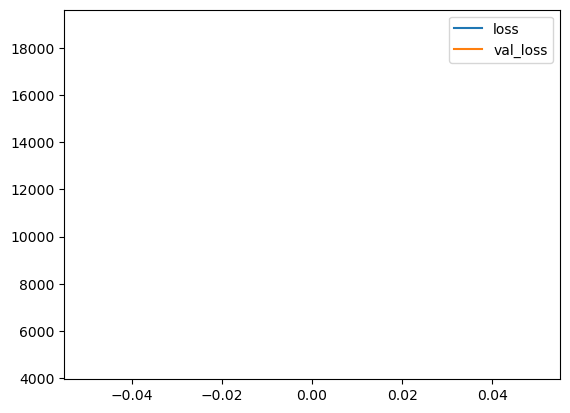

In [92]:
# comparing the training and validation loss.
metrics_df[["loss","val_loss"]].plot()

In [93]:
# comparing the training and validation accuracy.
metrics_df[["binary_accuracy","val_binary_accuracy"]].plot()

KeyError: "None of [Index(['binary_accuracy', 'val_binary_accuracy'], dtype='object')] are in the [columns]"

## Model Evaluation

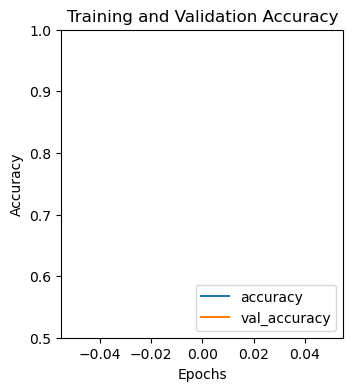

In [95]:
# Plotting the accuracy and loss over time 

# Training history 
history_dict = history1.history 

# Seperating validation and training accuracy 
acc = history_dict['accuracy'] 
val_acc = history_dict['val_accuracy'] 

# Seperating validation and training loss 
loss = history_dict['loss'] 
val_loss = history_dict['val_loss'] 

# Plotting 
plt.figure(figsize=(8, 4)) 
plt.subplot(1, 2, 1) 
plt.plot(acc, label='accuracy') 
plt.plot(val_acc, label = 'val_accuracy') 
plt.title('Training and Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend(['Accuracy', 'Validation Accuracy']) 
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


# test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

# plt.subplot(1, 2, 2) 
# plt.plot(loss) 
# plt.plot(val_loss) 
# plt.title('Training and Validation Loss') 
# plt.xlabel('Epochs') 
# plt.ylabel('Loss') 
# plt.legend(['Loss', 'Validation Loss']) 

plt.show()


In [96]:
val_loss, val_accuracy = hybrid_model1.evaluate(X_val, y_val)
print('Accuracy on validation dataset:', val_accuracy)
print('Loss on validation dataset:', val_loss)

1/1 [==============================] - 24s 24s/step - loss: 17.1240 - accuracy: 0.5000
Accuracy on validation dataset: 0.5
Loss on validation dataset: 17.123992919921875


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Accuracy on test dataset:', val_accuracy)
print('Loss on test dataset:', val_loss)

In [113]:
# val_loss, val_accuracy = hybrid_model2.evaluate(X_val, y_val)
# print('Accuracy on validation dataset:', val_accuracy)
# print('Loss on validation dataset:', val_loss)